In [1]:
!pip install pyyaml
!pip install matplotlib-venn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
from pprint import pprint
import sqlite3
import yaml
import re
import datetime

try: # for pip >= 10
    from pip._internal.req import parse_requirements
except ImportError: # for pip <= 9.0.3
    from pip.req import parse_requirements

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

## Easier navigation:

------------------------------------

### 1. <a href='#setup'>Setup</a>
------------------------------------
### 2. <a href='#null'>Null values</a>
### 3. <a href='#ok'>`column`: ok</a>
### 4. <a href='#seda'>Spec EDA</a>
### 5. <a href='#sinp'>Sample Inputs for each column</a>
------------------------------------
### 6. <a href='#conda'>`column`: conda - parse</a>
### 7. <a href='#pip'>`column`: pip - parse</a>
### 8. <a href='#dpdf'>Building a dependency df on conda/pip</a>
------------------------------------
### 9. <a href='#lpick'>Load pickle</a>

<a name='setup'></a>
## 1. Setup

<br>

In [3]:
con = sqlite3.connect('binder-specs.sqlite')
df = pd.read_sql('SELECT * FROM specs', con)

In [4]:
df.columns

Index(['ok', 'remote', 'git_ref', 'git_commit', 'apt', 'conda', 'pip',
       'pipfile', 'docker', 'setup', 'julia', 'r', 'nix', 'postbuild', 'start',
       'runtime', 'ls', 'resolved_commit'],
      dtype='object')

In [5]:
df

,ok,remote,git_ref,git_commit,apt,conda,pip,pipfile,docker,setup,julia,r,nix,postbuild,start,runtime,ls,resolved_commit
0,0,00Kai0/jupyter-book,master,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,0,00quanta/practicalAI,master,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,0,00quanta/requirements,master,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,0,04x/instagramCracker,master,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,0,1-Nameless-1/Lign167,59804a761525c729b6b7965e0526f4b4b25d5ddd,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166074,1,mdpetters/MEA-412-Notebooks,master,,None,None,None,None,# Dockerfile for building Atmospheric-Physics-...,None,"name = ""Atmospheric Physics""\nuuid = ""13a5dcd1...",None,None,None,None,None,"{"".gitignore"": 12, "".travis.yml"": 822, ""Docker...",e0ff4987ab44c3574b78a5022d244e659cab64ba
166075,1,mdpetters/mdpetters.github.io,740205b0c280e5d3998a1b1adcfef795c6c44711,,None,None,None,None,None,None,None,None,None,None,None,None,"{"".ipynb_checkpoints"": {""Thar Dust Charge Corr...",740205b0c280e5d3998a1b1adcfef795c6c44711
166076,1,mdpiper/notebooks,master,,None,None,None,None,None,None,None,None,None,None,None,None,"{"".gitignore"": 1203, ""LICENSE"": 1067, ""README....",5f88f0d6e37eab7125cfded784fe64a07a2cfe73
166077,1,mdreck/mdreck.github.io,master,222338c70f1e76802bf36769bf3f95bd6940e07a,None,None,None,None,None,None,None,None,None,None,None,None,"{""CHANGELOG.md"": 55635, ""Gemfile"": 37, ""LICENS...",222338c70f1e76802bf36769bf3f95bd6940e07a


In [6]:
dash = '-' * 60

<a name='null'></a>
## 2. Null values
Printing the number of null values in each column.

<br>

In [7]:
print('{:<15s}{:>8s}{:>20s}'.format('Name', 'Null values', 'Null %'))
print(dash)
for col in df.columns:
    print('{:<15s}{:>8s}{:>20s}'.format(col, str(len(df[df[col].isnull()])), str(round(len(df[df[col].isnull()]) / len(df), 2))))

Name           Null values              Null %
------------------------------------------------------------
ok                    0                 0.0
remote                0                 0.0
git_ref               0                 0.0
git_commit            0                 0.0
apt              155452                0.94
conda            131613                0.79
pip              111902                0.67
pipfile          165166                0.99
docker           155892                0.94
setup            155002                0.93
julia            163536                0.98
r                161233                0.97
nix              166044                 1.0
postbuild        144966                0.87
start            162859                0.98
runtime          157931                0.95
ls                 9825                0.06
resolved_commit   19334                0.12


The "" values were considered null but they are mainly applied for git_commit, which doesn't really matter too much (an empty commit is still a commit).

In [8]:
print('{:<15s}{:>8s}{:>20s}'.format('Name', 'Non-null values', 'Non-null %'))
print(dash)

for col in df.columns:
    nonnull = len(df[~df[col].isnull()][df[col] != ""][df[col] != "\n"])
    print('{:<15s}{:>8s}{:>20s}'.format(col, str(nonnull), str(round(nonnull / len(df), 2))))


Name           Non-null values          Non-null %
------------------------------------------------------------
ok               166079                 1.0
remote           166079                 1.0
git_ref          166079                 1.0
git_commit       107113                0.64
apt               10436                0.06
conda             34463                0.21
pip               53721                0.32
pipfile             913                0.01
docker            10187                0.06
setup             11072                0.07
julia              2483                0.01
r                  4823                0.03
nix                  35                 0.0
postbuild         21024                0.13
start              3220                0.02
runtime            8130                0.05
ls               156254                0.94
resolved_commit  146745                0.88


Many of the columns list dependencies (conda, pip, apt, pipfile, setup, julia, r, nix, runtime) and are pretty rare occurrences, but it would be useful to look at how many entries have AT LEAST one form of dependency listed.

In [9]:
list_of_cols = ["conda", "pip", "apt", "pipfile", "setup", "julia", "r", "nix", "runtime"]
len(df[list_of_cols].dropna(thresh=1))

95598

<a name='ok'></a>
## 3. col: `ok`

Comparing the proportion of null values in entries where `ok`=1 against entries where `ok`=0.

<br>

In [10]:
sum(df["ok"])

146745

In [11]:
ok_df = df[df["ok"] == 1]
nok_df = df[df["ok"] == 0]

print('{:<15s}{:>8s}{:>20s}'.format('Name', 'Null in ok=1', 'Null in ok=0'))
print(dash)
for col in df.columns:
    print('{:<15s}{:>10s}{:>20s}'.format(col, str(round(len(ok_df[ok_df[col].isnull()]) / len(ok_df), 2)), 
                                        str(round(len(nok_df[nok_df[col].isnull()]) / len(nok_df), 2))))


Name           Null in ok=1        Null in ok=0
------------------------------------------------------------
ok                    0.0                 0.0
remote                0.0                 0.0
git_ref               0.0                 0.0
git_commit            0.0                 0.0
apt                  0.93                 1.0
conda                0.77                 1.0
pip                  0.63                 1.0
pipfile              0.99                 1.0
docker               0.93                 1.0
setup                0.92                 1.0
julia                0.98                 1.0
r                    0.97                 1.0
nix                   1.0                 1.0
postbuild            0.86                 1.0
start                0.98                 1.0
runtime              0.94                 1.0
ls                    0.0                0.51
resolved_commit       0.0                 1.0


<a name='seda'></a>
## 4. Spec EDA

<br>

ok               146745                 1.0
remote           146745                 1.0
git_ref          146745                 1.0
git_commit        98329                0.67
apt               10436                0.07
conda             34463                0.23
pip               53721                0.37
pipfile             913                0.01
docker            10187                0.07
setup             11072                0.08
julia              2483                0.02
r                  4823                0.03
nix                  35                 0.0
postbuild         21024                0.14
start              3220                0.02
runtime            8130                0.06
ls               146745                 1.0
resolved_commit  146745                 1.0


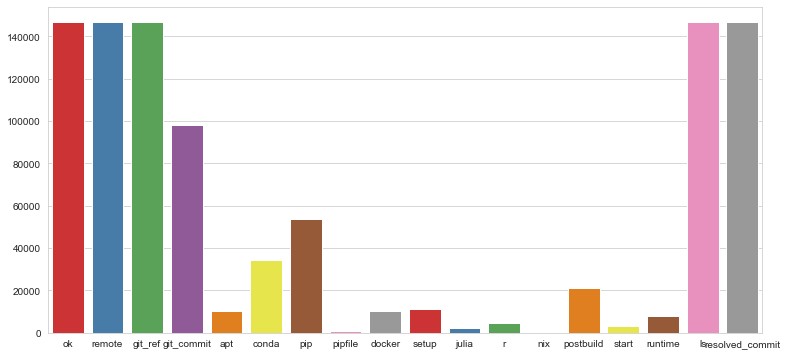

In [12]:
nnull_x, nnull_y = [], []
for col in ok_df.columns:
    nonnull = len(ok_df[~ok_df[col].isnull()][ok_df[col] != ""][ok_df[col] != "\n"])
    print('{:<15s}{:>8s}{:>20s}'.format(col, str(nonnull), str(round(nonnull / len(ok_df), 2))))
    nnull_x.append(col)
    nnull_y.append(nonnull)
    
plt.figure(figsize=(12.8,6))
plot = sns.barplot(x=nnull_x, y=nnull_y, palette="Set1")

As the `ok`=0 entries have 100% null values in most columns, will exclude from future visualizations.

We expect the entries with at least one dependency col to be the same, and find that roughly **65%** of the `ok_df` entries satisfy this.

In [13]:
list_of_cols = ["conda", "pip", "apt", "pipfile", "setup", "julia", "r", "nix", "runtime"]
len(ok_df[list_of_cols].dropna(thresh=1)), len(ok_df[list_of_cols].dropna(thresh=1)) / len(ok_df)

(95598, 0.6514566084023306)

In particular, we are interested in seeing the % for conda/pip. We use a new total where at least one dependency is present. To get the total conda+pip columns, we can do **A+B-AB**, since the overlap is considered twice in A+B. Then, divide this by the total to get a proportion.

In [14]:
venn_total = len(ok_df[list_of_cols].dropna(thresh=1))
venn_CP = len(df[~df['pip'].isnull()][~df['conda'].isnull()])
venn_C = len(df[~df['pip'].isnull()][df['conda'].isnull()])
venn_P = len(df[df['pip'].isnull()][~df['conda'].isnull()])
venn_none = venn_total - venn_C - venn_P

print(venn_C + venn_P - venn_CP, (venn_C + venn_P - venn_CP) / venn_total)

77705 0.8128308123600912


So, **81%** of entries with at least one dependency use conda/pip. We can also represent this in a venn diagram, with percentages to label the portions, where "The subsets parameter is a 3 element list where the numbers 30, 10, 5 correspond to Ab, aB, AB."

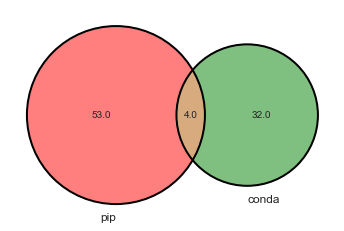

In [15]:
vA, vB, vAB = round(venn_C / venn_total, 2) * 100, round(venn_P / venn_total, 2) * 100, round(venn_CP / venn_total, 2) * 100
venn2(subsets = (vA, vB, vAB), set_labels = ('pip', 'conda'), alpha = 0.5)
venn2_circles(subsets = (vA, vB, vAB));

<a name='sinp'></a>
## 5. Sample inputs for each column

<br>

In [16]:
class color:
    RED = '\033[91m'
    BOLD = '\033[1m'
    END = '\033[0m'


for col in ok_df.columns:
    col_inputs = ok_df[~ok_df[col].isnull()][ok_df[col] != ""][ok_df[col] != "\n"][col].reset_index()[col]
    print(color.BOLD + color.RED + "COLUMN: " + col + color.END)
    
    for i in np.arange(5):
        print(str(i) + " " + str(col_inputs[i]))
        
    print()
    print(dash)
    print()

COLUMN: ok
0 1
1 1
2 1
3 1
4 1

------------------------------------------------------------

COLUMN: remote
0 mdsmith44/Army_ORSA_Python_Data_Analysis_Tutorial
1 mdsmith44/Git-Test
2 mdssmith/binder_test
3 mdsumner/polar-mapping-oghub
4 me2d09/coviduberounky

------------------------------------------------------------

COLUMN: git_ref
0 master
1 master
2 master
3 master
4 master

------------------------------------------------------------

COLUMN: git_commit
0 ab1be186a74c81c83f863bc3b6258fee46eeca56
1 9267f689d1935f5670e00d63b4f9639226f599ec
2 6464ab1b75787590096275bf36b6e3035f23d2ab
3 f4d256f2e4e8688261871073f9e7f87cacd7486c
4 562d55fbc439fbf936f32fcb9e09fbfa1f145936

------------------------------------------------------------

COLUMN: apt
0 vim

1 vim

2 openjdk-8-jdk
3 openjdk-8-jdk
4 openjdk-8-jdk

------------------------------------------------------------

COLUMN: conda
0 name: binder-example
dependencies:
    - python=3.7
    - numpy
    - pandas
    - matplotlib
1 # Conda

COLUMN: start
0 #!/usr/bin/env python3
import sys
import shutil
import os

argv = sys.argv[1:] + ['--config', 'binder/jupyter_notebook_config.py']
print(argv)

os.execv(shutil.which(argv[0]), argv)
1 #!/usr/bin/env python3
import sys
import shutil
import os

argv = sys.argv[1:] + ['--config', 'binder/jupyter_notebook_config.py']
print(argv)

os.execv(shutil.which(argv[0]), argv)
2 #!/usr/bin/env python3
import sys
import shutil
import os

argv = sys.argv[1:] + ['--config', 'binder/jupyter_notebook_config.py']
print(argv)

os.execv(shutil.which(argv[0]), argv)
3 #!/usr/bin/env python3
import sys
import shutil
import os

argv = sys.argv[1:] + ['--config', 'binder/jupyter_notebook_config.py']
print(argv)

os.execv(shutil.which(argv[0]), argv)
4 #!/usr/bin/env python3
import sys
import shutil
import os

argv = sys.argv[1:] + ['--config', 'binder/jupyter_notebook_config.py']
print(argv)

os.execv(shutil.which(argv[0]), argv)

------------------------------------------------------------

COL

Or, to look at a particular column:

In [17]:
col='conda'
ok_df[~ok_df[col].isnull()][col].reset_index()[col].value_counts()

name: example-environment\nchannels:\n  - conda-forge\ndependencies:\n  - numpy\n  - psutil\n  - toolz\n  - matplotlib\n  - dill\n  - pandas\n  - partd\n  - bokeh\n  - dask\n                                                                                                                                                                                                                                                                                                                    690
name: mat281\nchannels:\n  - conda-forge\n  - defaults\ndependencies:\n  - altair=4\n  - altair_saver\n  - beautifulsoup4=4.9\n  - h5py=2.10\n  - ipywidgets=7.5\n  - jupyterlab=2.1.3\n  - matplotlib-base=3.2\n  - nodejs\n  - numba=0.48\n  - numpy\n  - pandas=1\n  - pandas-profiling\n  - pip\n  - pillow\n  - python=3.7\n  - rise\n  - scikit-image=0.16\n  - scikit-learn=0.22\n  - scipy=1.4\n  - seaborn=0.10\n  - statsmodels=0.11\n  - sympy=1.5\n  - vega_datasets\n  - xlrd=1.2    349
dependencies:\n  - python=3\

<a name='conda'></a>
## 6. col: `conda` - parse

 - .loc is simply way too slow past n>1000. Creating a temp df with .at and appending every 1000 entries to the main df.

<br>

In [18]:
def conda_parse(df, delete_indices, dp_df, dc_df, test_cap=9999999, benchmark=False):    
    conda_L = df[~df['conda'].isnull()]['conda'].reset_index()
    errors=0
    temp_df = pd.DataFrame()
    a = datetime.datetime.now()
    time_list = []
    for i in np.arange(min(test_cap, len(conda_L))):
        if (i % 1000 == 0):
            dp_df = dp_df.append(temp_df)
            temp_df = pd.DataFrame()
            if benchmark:
                b = datetime.datetime.now()
                c = b - a
                time_list.append(c.seconds)
                print(str(i) + " " + str(c.seconds))
                a = datetime.datetime.now()
        true_index = conda_L.loc[i, "index"]
        try:
            dependency_list = yaml.load(conda_L['conda'][i], Loader=yaml.FullLoader)["dependencies"]
            for d_line in dependency_list:
                # will do something about this later
                if (type(d_line) != dict):
                    d_line = d_line.replace(" ", "").lower()
                    d_line = re.split('<=|>=|>|<|=', d_line, maxsplit=1)
                    d_name = d_line[0]
                    if (len(d_line) > 1):
                        d_type = d_line[1]
                        #dp_df.loc[true_index, d_name] = d_type
                        temp_df.at[true_index, d_name] = d_type
                    else:
                        #dp_df.loc[true_index, d_name] = "Default"
                        temp_df.at[true_index, d_name] = 'Default'
                        pass
                dc_df.loc[true_index, 'conda'] = 1
        except:
            delete_indices.append(true_index)
    
    dp_df = dp_df.append(temp_df)
    if benchmark:
        b = datetime.datetime.now()
        c = b - a
        time_list.append(c.seconds)
        return delete_indices, dp_df, dc_df, time_list[1:]
    return delete_indices, dp_df, dc_df

delete_indices, dp_df, dc_df, conda_times = conda_parse(ok_df, [], pd.DataFrame(), pd.DataFrame(), 1500, True)

0 0
1000 25


In [19]:
dp_coln = 300
dp_df.columns[dp_coln : dp_coln + 100]

Index(['pytest-remotedata', 'python-dateutil', 'python-libarchive-c', 'pytz',
       'pywavelets', 'pywin32', 'pywinpty', 'pyzmq', 'qt', 'qtawesome',
       'qtconsole', 'qtpy', 'requests', 'rope', 'ruamel_yaml', 'send2trash',
       'setuptools', 'simplegeneric', 'singledispatch', 'sip', 'six', 'snappy',
       'snowballstemmer', 'sortedcollections', 'sortedcontainers', 'soupsieve',
       'sphinx', 'sphinxcontrib', 'sphinxcontrib-applehelp',
       'sphinxcontrib-devhelp', 'sphinxcontrib-htmlhelp',
       'sphinxcontrib-jsmath', 'sphinxcontrib-qthelp',
       'sphinxcontrib-serializinghtml', 'sphinxcontrib-websupport', 'spyder',
       'spyder-kernels', 'sqlalchemy', 'sqlite', 'statsmodels', 'tblib',
       'tensorflow-base', 'tensorflow-estimator', 'tensorflow-gpu-base',
       'termcolor', 'terminado', 'testpath', 'tk', 'toolz', 'tornado',
       'traitlets', 'typed-ast', 'unicodecsv', 'urllib3', 'vc',
       'vs2015_runtime', 'wcwidth', 'webencodings', 'werkzeug', 'wheel',
       

In [20]:
conda_times[1:]

[6]

<a name='pip'></a>
## 7. col: `pip` - parse

Notes:
 - Anything with a '#' is a comment, so the entire line (up until \n) after is discarded along with '#'.
 - There are large blocks of --hash where each hash is preceded by a '\\\n'. These can be removed with split. 
 - Same >=, <=, etc. rules apply as in conda, but instead of '=' it is now '=='.

<br>

In [21]:
df[~df['pip'].isnull()]['pip'].reset_index()['pip'][4].replace(" ", "").lower().split("\n")

['requests==2.24.0', 'beautifulsoup4==4.9.3', 'ufit==1.4.1', '']

In [22]:
"h#i"[:2]

'h#'

In [23]:
df[~df[col].isnull()][col].reset_index()[col][144]

'dependencies:\n  - python=3.8\n  - jupyter\n  - ipykernel\n  - plotly\n  - pandas\n'

In [34]:
def pip_parse(df, delete_indices, dp_df, dc_df, test_cap=9999999, benchmark=False):    
    pip_L = df[~df['pip'].isnull()]['pip'].reset_index()
    errors=0
    temp_df = pd.DataFrame()
    a = datetime.datetime.now()
    time_list = []
    for i in np.arange(min(test_cap, len(pip_L))):
        if (i % 1000 == 0):
            d = datetime.datetime.now()
            e = d - a
            dp_df = dp_df.append(temp_df)
            temp_df = pd.DataFrame()
            if benchmark:
                b = datetime.datetime.now()
                c = b - d
                time_list.append(c.seconds + e.seconds)
                print(str(i) + " " + str(e.seconds) + " " + str(c.seconds))
                a = datetime.datetime.now()
        true_index = pip_L.loc[i, "index"]
        try:
            dependency_list = pip_L['pip'][i].replace(" ", "").lower().split("\n")
            for d_line in dependency_list:
                # will do something about this later
                if ((d_line != '') and (d_line[:2] != "--")):
                    d_line = d_line.split("#")[0]
                    d_line = re.split('<=|>=|>|<|==|@', d_line, maxsplit=1)
                    d_name = d_line[0]
                    if (len(d_line) > 1):
                        d_type = d_line[1]
                        #dp_df.loc[true_index, d_name] = d_type
                        temp_df.at[true_index, d_name] = d_type
                    else:
                        #dp_df.loc[true_index, d_name] = "Default"
                        temp_df.at[true_index, d_name] = "Default"
                dc_df.loc[true_index, 'pip'] = 1
        except:
            delete_indices.append(true_index)
            
    dp_df = dp_df.append(temp_df)
    if benchmark:
        b = datetime.datetime.now()
        c = b - a
        time_list.append(c.seconds)
        return delete_indices, dp_df, dc_df, time_list[1:]
    return delete_indices, dp_df, dc_df

delete_indices, dp_df, dc_df, pip_times = pip_parse(ok_df, [], pd.DataFrame(), pd.DataFrame(), 100, True)

0 0 0


In [25]:
dp_coln = 100
dp_df.columns[dp_coln : dp_coln + 100]

Index(['wcwidth', 'webencodings', 'widgetsnbextension', 'zipp', 'mysqlclient',
       'pymysql', 'flask', 'xlsxwriter', 'voila', 'fastai2', 'pydicom',
       'git+https://github.com/fastai/fastai.git',
       'git+https://github.com/mwouts/jupytext.git',
       'jupyter_contrib_nbextensions', 'rise', 'scikit-learn', 'colorama',
       'cycler', 'kiwisolver', 'pywin32', 'simpy', 'jupyter-server-proxy',
       'uproot', 'lmfit', 'pandas_datareader', 'sagemaker', 'tensorflow',
       'keras', 'quandl', 'fastai',
       'https://download.pytorch.org/whl/cpu/torch-1.6.0%2bcpu-cp38-cp38-linux_x86_64.whl',
       'https://download.pytorch.org/whl/cpu/torchvision-0.7.0%2bcpu-cp38-cp38-linux_x86_64.whl',
       'twarc', 'twint', 'aiohttp', 'aiodns', 'cchardet', 'elasticsearch',
       'aiohttp_socks', 'schedule', 'geopy', 'emoji', 'jupyter-book',
       'ghp-import',
       'git+https://github.com/maria-antoniak/little-mallet-wrapper.git',
       'spacy', 'regex', 'little_mallet_wrapper', 'nltk

In [26]:
col='pip'
for i in np.arange(10):
    print()
    print()
    print(i)
    print(df[~df[col].isnull()][col].reset_index()[col][i])



0
numpy==1.18.5
pandas==1.0.5
fuzzywuzzy==0.18.0
bs4==0.0.1
geopandas==0.8.1
pycountry==20.7.3
matplotlib==3.2.2
seaborn==0.10.1
bokeh==2.2.3
sklearn==0.0
xlrd==1.2.0


1
requests==2.24.0
numpy==1.19.2
matplotlib==3.3.2


2
requests==2.24.0
numpy==1.19.2
matplotlib==3.3.2


3
requests==2.24.0 
beautifulsoup4==4.9.3 
ufit==1.4.2



4
requests==2.24.0 
beautifulsoup4==4.9.3 
ufit==1.4.1



5
requests==2.24.0 
beautifulsoup4==4.9.3 
ufit==1.4.2



6
requests==2.24.0 
beautifulsoup4==4.9.3 
ufit==1.4.1



7
# ========================================
#               DASH APP
# ========================================
dash #==1.11.0
dash-bootstrap-components #==0.9.2

# ========================================
#               DATA ANALYSIS
# ========================================
pandas #==1.0.3
numpy
scipy

iso3166
datetime

# ========================================
#               DATA VIZ
# ========================================
plotly #==4.6.0

# ==================================

In [27]:
yaml.load(df[~df[col].isnull()][col].reset_index()[col][15], Loader=yaml.FullLoader)

'voila fastai2>=0.0.16 pillow<7 packaging ipywidgets==7.5.1'

In [28]:
df[~df[col].isnull()][col].reset_index()[col][7]

'# ========================================\n#               DASH APP\n# ========================================\ndash #==1.11.0\ndash-bootstrap-components #==0.9.2\n\n# ========================================\n#               DATA ANALYSIS\n# ========================================\npandas #==1.0.3\nnumpy\nscipy\n\niso3166\ndatetime\n\n# ========================================\n#               DATA VIZ\n# ========================================\nplotly #==4.6.0\n\n# ========================================\n#           SERVER & DEPLOYMENT\n# ========================================\ngunicorn #==20.0.4\n\n'

In [29]:
[line for line in df[~df[col].isnull()][col].reset_index()[col][0] if "==" in line]

[]

In [30]:
install_reqs = parse_requirements(df[~df[col].isnull()][col].reset_index()[col][1], session='hack')
reqs = [str(ir.req) for ir in install_reqs]

InstallationError: Could not open requirements file: [Errno 22] Invalid argument: 'requests==2.24.0\nnumpy==1.19.2\nmatplotlib==3.3.2'

<a name='dpdf'></a>
## 8. Building a dependency df on conda/pip

<br>

In [31]:
dp_df, dc_df, delete_indices = pd.DataFrame(), pd.DataFrame(), []

delete_indices, dp_df, dc_df, conda_times = conda_parse(ok_df, delete_indices, dp_df, dc_df, benchmark=True)
delete_indices, dp_df, dc_df, pip_times = pip_parse(ok_df, delete_indices, dp_df, dc_df, benchmark=True)

#dp_df.drop(delete_indices)
#dc_df.drop(delete_indices)

dc_df = dc_df.fillna(0)

0 0
1000 24
2000 19
3000 13
4000 12
5000 19
6000 18
7000 27
8000 32
9000 38
10000 25
11000 34
12000 21
13000 17
14000 20
15000 16
16000 17
17000 32
18000 18
19000 20
20000 19
21000 15
22000 21
23000 13
24000 17
25000 23
26000 23
27000 16
28000 18
29000 18
30000 22
31000 23
32000 26
33000 18
34000 25
0 0 3
1000 13 2
2000 10 5
3000 12 5
4000 12 6
5000 14 6
6000 9 6
7000 14 6
8000 22 7
9000 15 8
10000 9 9
11000 17 8
12000 34 11
13000 17 10
14000 17 15
15000 27 12
16000 26 13
17000 18 14
18000 23 17
19000 41 21
20000 19 23
21000 16 26
22000 15 29
23000 15 30
24000 25 34
25000 12 32
26000 12 32
27000 13 31
28000 17 36
29000 27 36
30000 18 36
31000 20 43
32000 15 64
33000 19 91
34000 17 52
35000 15 102
36000 10 80
37000 15 97


KeyboardInterrupt: 

In [ ]:
len(dp_df)

In [ ]:
delete_indices

In [ ]:
dp_df

In [ ]:
dc_df

In [ ]:
dp_df["pandas"].value_counts()

In [ ]:
for i in dp_df.columns:
    print(i + " " + str(dp_df[i].count() / len(dp_df)))

In [ ]:
dp_df.to_pickle("./dp_df.pkl")

<a name='lpick'></a>
## 9. Load pickle

<br>

In [3]:
sdf = pd.read_pickle("./dp_df.pkl")

In [4]:
sdf

,python,numpy,pandas,matplotlib,gammapy,ipython,cython,jupyter,jupyterlab,pyyaml,...,kliff,fipy,spectrum_utils,r-mcmcpack,r-randtoolbox,r-renv,debtcollector,psikit,uproot4,dash_cytoscape
13922,3.7,Default,Default,Default,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13932,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13934,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13935,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13936,3.7.0,1.18.1,0.25,3.2.1,0.17,7.10,Default,Default,2.0.1,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166064,NaN,Default,NaN,Default,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166065,NaN,Default,NaN,Default,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166066,NaN,Default,NaN,Default,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166067,NaN,Default,NaN,Default,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a name='leda'></a>
## 10. Library EDA

<br>

<AxesSubplot:>

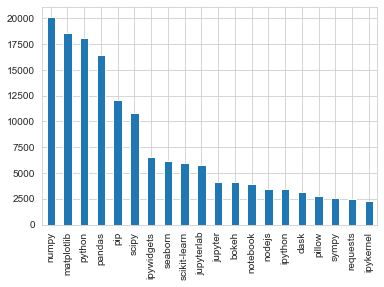

In [5]:
sdf.count().sort_values(ascending=False).head(20).plot.bar()

<AxesSubplot:>

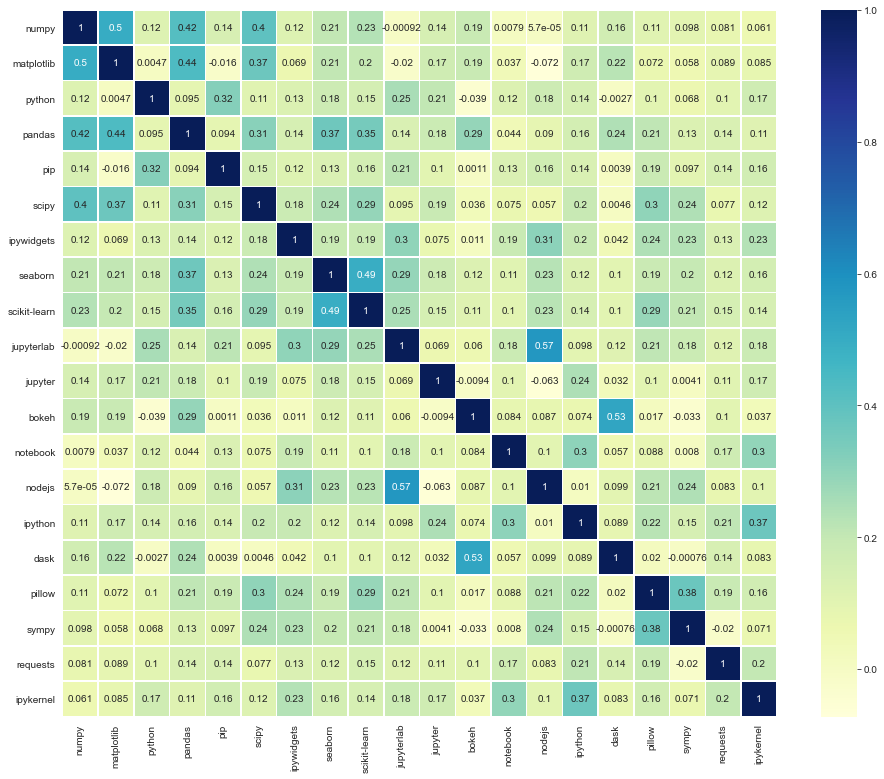

In [6]:
labels = sdf.count().sort_values(ascending=False).head(20).index
plt.figure(figsize=(16,13))
heatmap_df = sdf[labels].notnull().astype('int')
cor = heatmap_df.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu", linewidths=.5)

<AxesSubplot:ylabel='Frequency'>

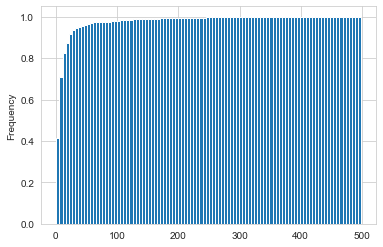

In [13]:
sdf.count(axis=1).plot.hist(cumulative=True, density=1, bins=100)

<AxesSubplot:ylabel='Frequency'>

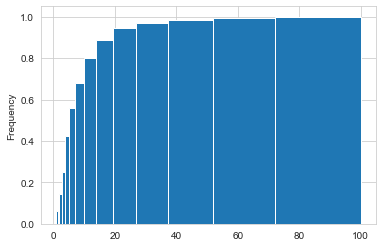

In [16]:
sdf.count(axis=1).plot.hist(cumulative=True, density=1, bins=np.logspace(np.log10(1),np.log10(100), 15))

In [ ]:
sdf.count(axis=1).plot(x = 'value', y = 'cdf', grid = True)

<a name='veda'></a>
## 10. Library Version EDA

<br>